<a href="https://colab.research.google.com/github/Shufen-Yin/Artificial-Intelligence/blob/main/Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns




In [42]:
# Load dataset

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
from google.colab import files
uploaded = files.upload()


Saving images.zip to images.zip


In [44]:
zip_path = '/content/drive/MyDrive/images.zip'
extract_path = '/content/drive/MyDrive/images_dataset'

import zipfile, os
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzip path:", extract_path)
print("Content:", os.listdir(extract_path))


Unzip path: /content/drive/MyDrive/images_dataset
Content: ['images']


In [45]:
!ls -l /content/drive/MyDrive/images_dataset/images/

total 20
drwx------ 2 root root 4096 Nov 13 16:42 dalmatian
drwx------ 2 root root 4096 Nov 13 16:42 dollar_bill
drwx------ 2 root root 4096 Nov 13 16:42 pizza
drwx------ 2 root root 4096 Nov 13 16:42 soccer_ball
drwx------ 2 root root 4096 Nov 13 16:42 sunflower


In [ ]:
# Task 1 Prepare data

# 1 Path to the extracted images folder
base_path = '/content/drive/MyDrive/images_dataset/images'  # Update if needed
# Parameters
img_size = (64, 64)

X = []
y = []
class_names = []

# Loop through each class folder
for class_folder in os.listdir(base_path):
    class_path = os.path.join(base_path, class_folder)
    if os.path.isdir(class_path):
        class_names.append(class_folder)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize(img_size)
                img_array = np.array(img).flatten() / 255.0  # Normalize
                X.append(img_array)
                y.append(class_folder)
            except:
                print("Could not process image:", img_path)

X = np.array(X)
y = np.array(y)

print("Number of images:", len(y))
print("Classes:", class_names)
print("Feature shape:", X.shape)


Number of images: 309
Classes: ['dalmatian', 'dollar_bill', 'pizza', 'soccer_ball', 'sunflower']
Feature shape: (309, 12288)


In [ ]:
# 2 Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training images:", len(y_train))
print("Test images:", len(y_test))


Training images: 247
Test images: 62


In [ ]:
#Task 2  Train Random Forest
# 1 Tain Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print(" Random Forest model trained!")


 Random Forest model trained!


In [ ]:
# 2 Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20],             # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]            # Minimum samples at a leaf node
}

# Create the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fit Grid Search on training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Get the best estimator (model) using best parameters
best_rf_model = grid_search.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
# Task 3 Evaluate the Model

# 1 Predict on test set
y_pred = best_rf_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.7258064516129032

Classification Report:
              precision    recall  f1-score   support

   dalmatian       0.65      0.79      0.71        14
 dollar_bill       0.88      0.70      0.78        10
       pizza       0.64      0.70      0.67        10
 soccer_ball       0.67      0.55      0.60        11
   sunflower       0.82      0.82      0.82        17

    accuracy                           0.73        62
   macro avg       0.73      0.71      0.72        62
weighted avg       0.73      0.73      0.73        62



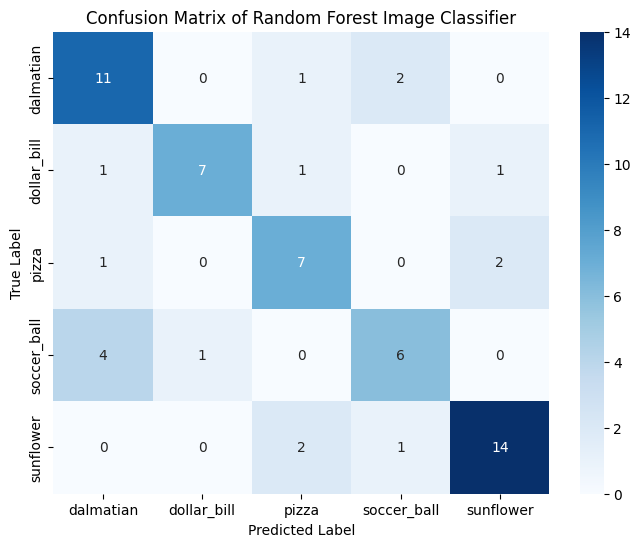

In [ ]:
# 2 Create and Visualize Confusion Matrix
# Compute confusion matrix
y_pred = best_rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Get class names from your dataset folder
class_names = np.unique(y_test)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Random Forest Image Classifier')
plt.show()


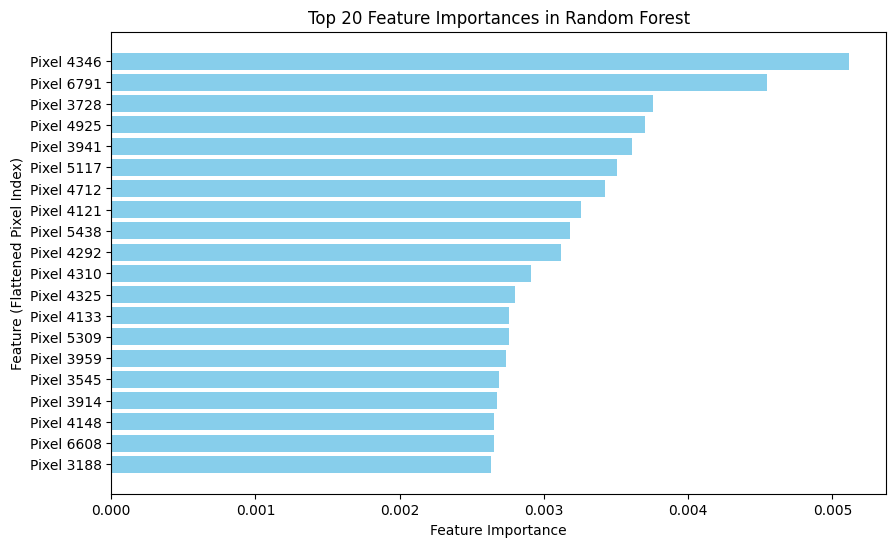

In [ ]:
# Task 4 Feature Importance Visualization


# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# For visualization, select top N most important features
N = 20  # top 20 features
indices = np.argsort(importances)[-N:]  # indices of top features

# Plot
plt.figure(figsize=(10,6))
plt.barh(range(N), importances[indices], color='skyblue')
plt.yticks(range(N), [f'Pixel {i}' for i in indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature (Flattened Pixel Index)')
plt.title('Top 20 Feature Importances in Random Forest')
plt.show()


In [ ]:
# Task 5 Predict on New Images
# 1 Define a Function to Predict Class

def predict_image_class(image_path, model, img_size=(64,64)):
    """
    Predict the class of a single image using a trained Random Forest model.

    Args:
        image_path (str): Path to the image file.
        model (sklearn RandomForestClassifier): Trained Random Forest model.
        img_size (tuple): Size to resize the image (width, height).

    Returns:
        str: Predicted class label.
    """
    try:
        # Load image and convert to RGB
        img = Image.open(image_path).convert('RGB')
        # Resize image
        img = img.resize(img_size)
        # Flatten and normalize
        img_array = np.array(img).flatten() / 255.0
        # Reshape to (1, num_features) for prediction
        img_array = img_array.reshape(1, -1)
        # Predict class
        pred_class = model.predict(img_array)[0]
        return pred_class
    except Exception as e:
        print("Error processing image:", e)
        return None


In [ ]:
!ls /content/drive/MyDrive/images_dataset/images/pizza/


image_0001.jpg	image_0012.jpg	image_0023.jpg	image_0035.jpg	image_0046.jpg
image_0002.jpg	image_0013.jpg	image_0024.jpg	image_0036.jpg	image_0047.jpg
image_0003.jpg	image_0014.jpg	image_0025.jpg	image_0037.jpg	image_0048.jpg
image_0004.jpg	image_0015.jpg	image_0026.jpg	image_0038.jpg	image_0049.jpg
image_0005.jpg	image_0016.jpg	image_0027.jpg	image_0039.jpg	image_0050.jpg
image_0006.jpg	image_0017.jpg	image_0028.jpg	image_0040.jpg	image_0051.jpg
image_0007.jpg	image_0018.jpg	image_0029.jpg	image_0041.jpg	image_0052.jpg
image_0008.jpg	image_0019.jpg	image_0030.jpg	image_0042.jpg	image_0053.jpg
image_0009.jpg	image_0020.jpg	image_0031.jpg	image_0043.jpg
image_0010.jpg	image_0021.jpg	image_0032.jpg	image_0044.jpg
image_0011.jpg	image_0022.jpg	image_0034.jpg	image_0045.jpg


In [ ]:
# 2 Test the function with a new image and print the predicted class.
# Path to an existing pizza image
new_image_path = '/content/drive/MyDrive/images_dataset/images/pizza/image_0001.jpg'

# Predict its class
predicted_class = predict_image_class(new_image_path, best_rf_model)
print("Predicted class for the selected image:", predicted_class)



Predicted class for the selected image: pizza


In [ ]:
#Task 6 Bonus: Comparing with SVM:
# 1 Implement SVM classification using SVC from sklearn.svm.
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],          # Regularization
    'kernel': ['linear', 'rbf'],# Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
}

# Create SVM classifier
svc = SVC()

In [ ]:

#Follow a similar process as with Random Forest to train and evaluate the SVM model.
#2: Grid search to find best SVM parameters
# Grid search with 3-fold cross-validation
grid_svm = GridSearchCV(svc, param_grid_svm, cv=3, n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train)

print("Best SVM parameters:", grid_svm.best_params_)

# Best model
best_svm_model = grid_svm.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best SVM parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


SVM Test Accuracy: 0.7580645161290323
SVM Classification Report:
               precision    recall  f1-score   support

   dalmatian       0.59      0.71      0.65        14
 dollar_bill       0.60      0.60      0.60        10
       pizza       0.90      0.90      0.90        10
 soccer_ball       0.71      0.45      0.56        11
   sunflower       0.94      1.00      0.97        17

    accuracy                           0.76        62
   macro avg       0.75      0.73      0.73        62
weighted avg       0.76      0.76      0.75        62



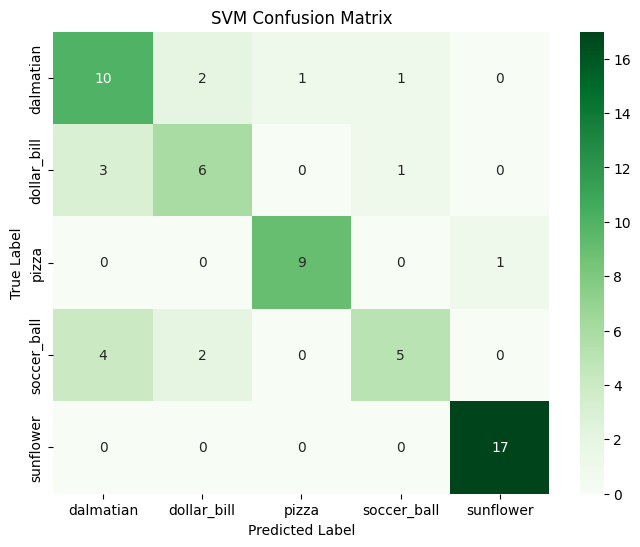

In [ ]:
# 3: Evaluate SVM on the test set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred_svm = best_svm_model.predict(X_test)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Test Accuracy:", accuracy_svm)

# Classification report
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Optional: visualize confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()



4: Compare with Random Forest

| Model         | Accuracy          | Notes                                                              |
| ------------- | ----------------- | ------------------------------------------------------------------ |
| Random Forest | 0.73              | Fast training, interpretable feature importance                    |
| SVM           |0.75 | Good for smaller datasets; may be slower on large flattened images |







In [ ]:
# Step 1: Install Git if not already installed
!apt-get install git -y

# Step 2: Configure Git
!git config --global user.name "Shufen Yin"
!git config --global user.email "mickeyyinabc@gmail.com"

# Step 3: Navigate to a temporary folder
import os
os.makedirs("/content/temp_repo", exist_ok=True)
os.chdir("/content/temp_repo")

# Step 4: Initialize Git repository
!git init
!git remote add origin https://github.com/ShufenYin/Assignment-11-SF.git

# Step 5: Copy your notebook into the folder
import shutil
shutil.copy("/content/Assignment 11.ipynb", "./Assignment 11.ipynb")

# Step 6: Add and commit
!git add "Assignment 11.ipynb"
!git commit -m "Upload Assignment 11 Colab notebook"

# Step 7: Use getpass to safely enter your GitHub token
from getpass import getpass
token = getpass("Enter your GitHub personal access token: ")

# Step 8: Push using HTTPS with token
!git push -u https://{token}@github.com/ShufenYin/Assignment-11-SF.git main


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
Reinitialized existing Git repository in /content/temp_repo/.git/
error: remote origin already exists.
On branch main
nothing to commit, working tree clean
